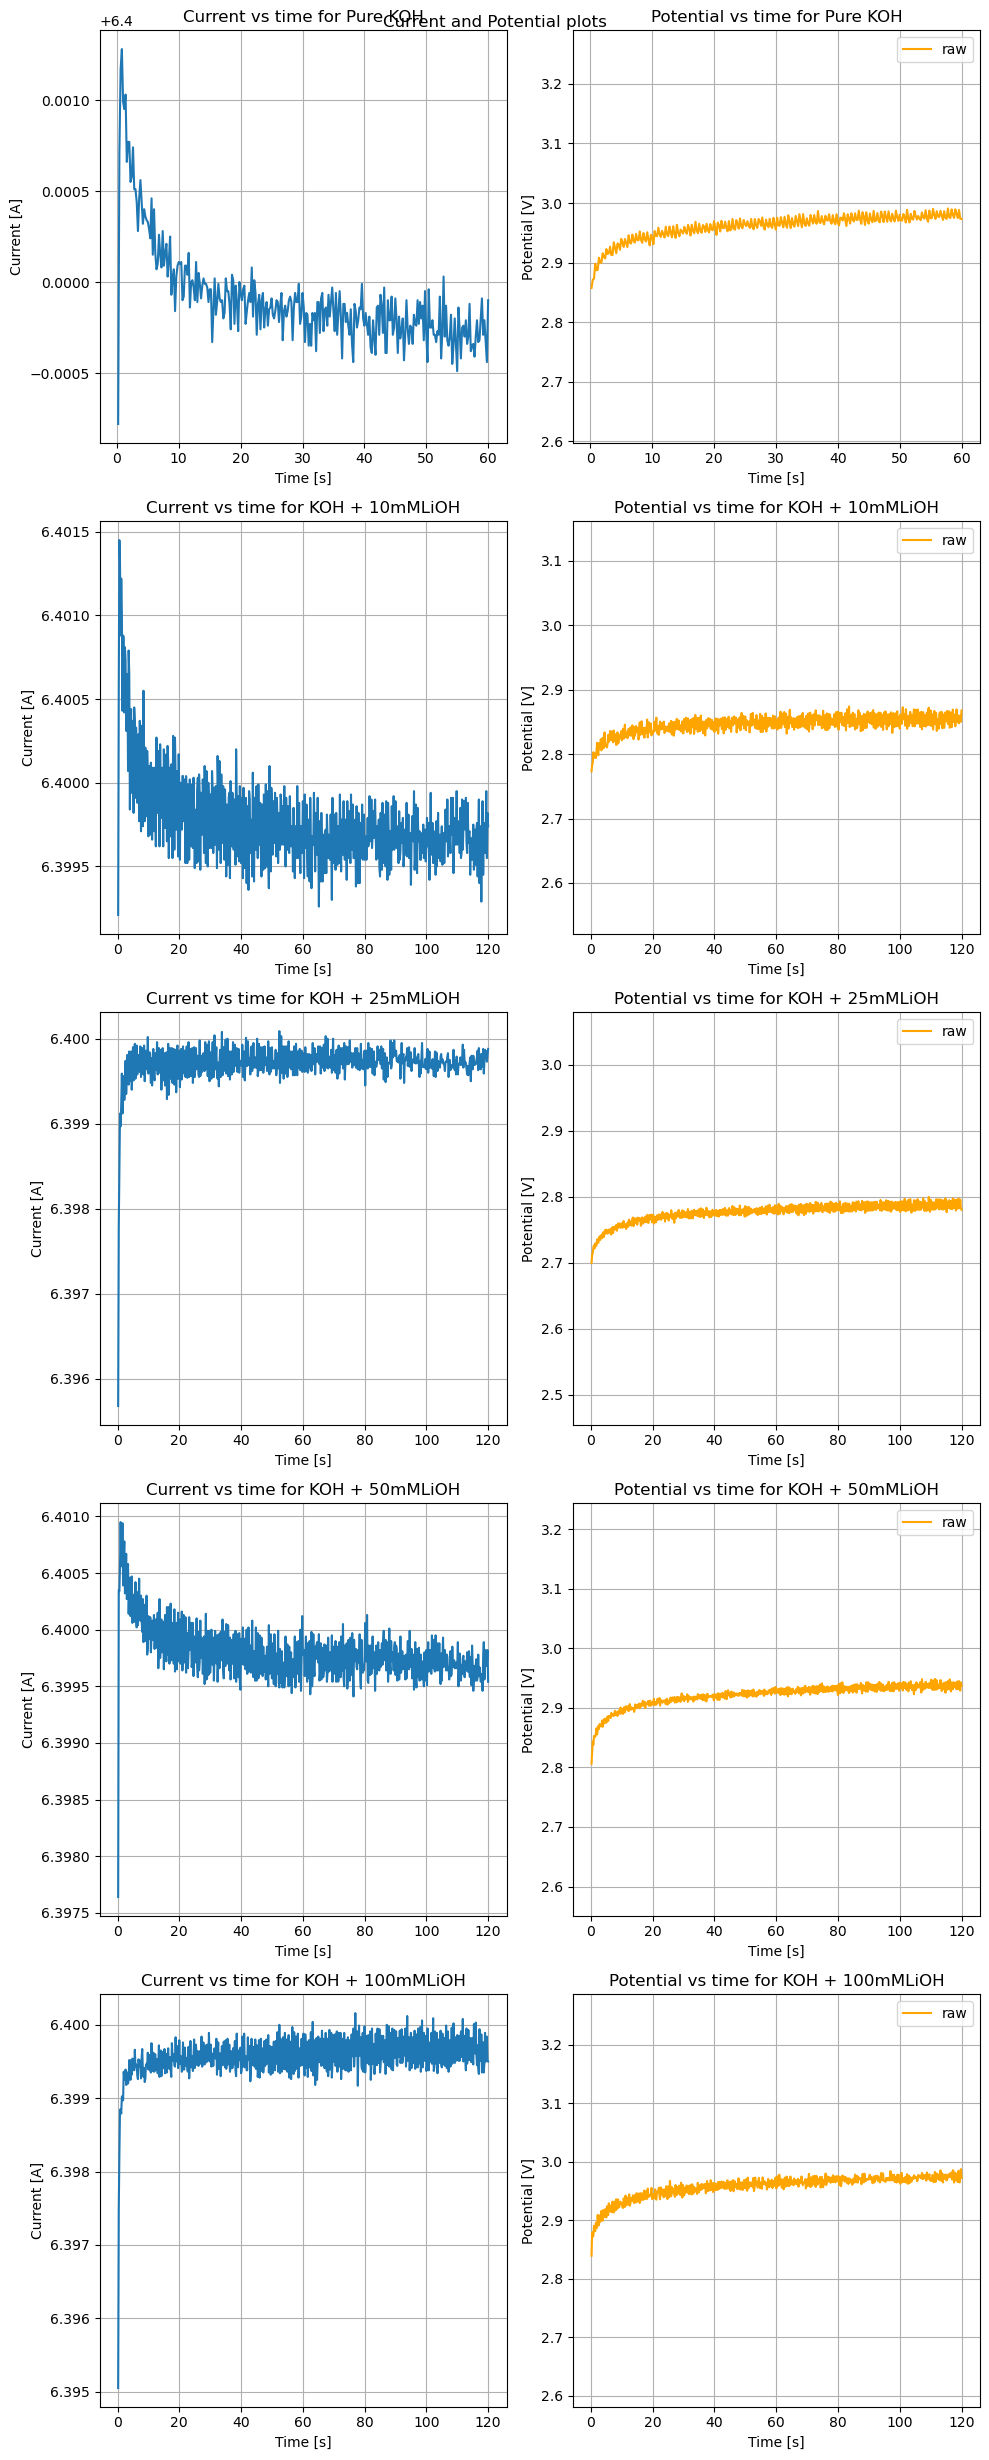

In [10]:
from ProcessingClass import Measurement
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline as cs




datetimes_start = [(2024, 11, 15, 12,  0, 0), (2024, 11, 15, 16,  0, 0), (2024, 11, 22, 15,  0, 0),  (2024, 11, 19, 12,  0, 0), (2024, 11, 22, 12,  0, 0)]
datestimes_end =  [(2024, 11, 15, 13, 30, 0), (2024, 11, 15, 18, 30, 0), (2024, 11, 22, 18,  0, 0),  (2024, 11, 19, 14, 30, 0), (2024, 11, 22, 14, 30, 0)]

foldernames = [
                'experiment1 6.5M KOH', 
                'experiment 2 6.5M KOH 10mM LiOH', 
                'exp6-6.5MKOHplus25mMLiOH',
                'exp3- 6.5MKOHplus50mM LiOH', 
                'experiment 5- 6.mKOHplus100mM LiOH']

nice_titles = [
                'Pure KOH', 
                'KOH + 10mMLiOH', 
                'KOH + 25mMLiOH', 
                'KOH + 50mMLiOH', 
                'KOH + 100mMLiOH'
                ]
experiments = []

for idx in range(len(foldernames)):
    exp = Measurement(datetimes_start[idx], datestimes_end[idx], foldernames[idx])
    experiments.append(exp)

fig, ax = plt.subplots(ncols = 2, nrows = len(experiments), figsize = (10, 5*len(experiments)))
ax = ax.flatten()
for i in range(max(1,len(experiments))):
    exp = experiments[i]
    data = exp.TRScans[0]
    fig.suptitle('Current and Potential plots')
    ax[i*2].set_title('Current vs time for ' + nice_titles[i])
    ax[i*2].plot(data['time'], data['I'])
    ax[i*2].grid()
    ax[i*2].set_xlabel('Time [s]')
    ax[i*2].set_ylabel('Current [A]')
    ax[i*2+1].set_title('Potential vs time for ' + nice_titles[i])
    ax[i*2+1].plot(data['time'], data['V'], label = 'raw', color = 'orange')
    ax[i*2+1].grid()
    ax[i*2+1].set_xlabel('Time [s]')
    ax[i*2+1].set_ylabel('Potential [V]')
    ax[i*2+1].legend()
    ax[i*2+1].set_ylim(min(data['V'])/1.1, max(data['V'])*1.1)

fig.tight_layout()

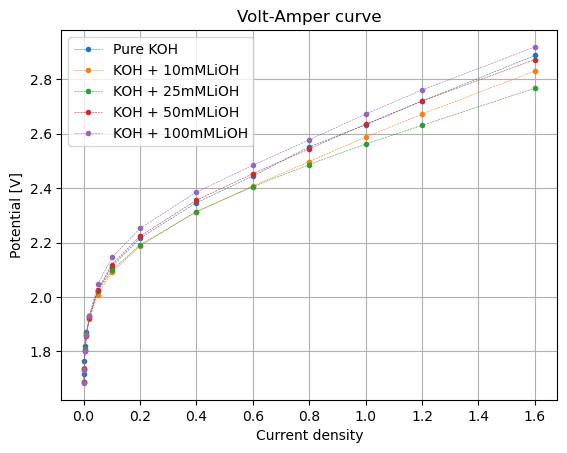

In [11]:
for i in range(max(1,len(experiments))):
    exp = experiments[i]
    exp.VAC_dataframe.sort_values(by = 'J')
    plt.plot(exp.VAC_dataframe['J'], exp.VAC_dataframe['V'], label = nice_titles[i],  marker = '.', linestyle = '--', lw = 0.4)


plt.grid(which='both')
plt.title('Volt-Amper curve')
plt.xlabel('Current density')
plt.ylabel('Potential [V]')
plt.legend()

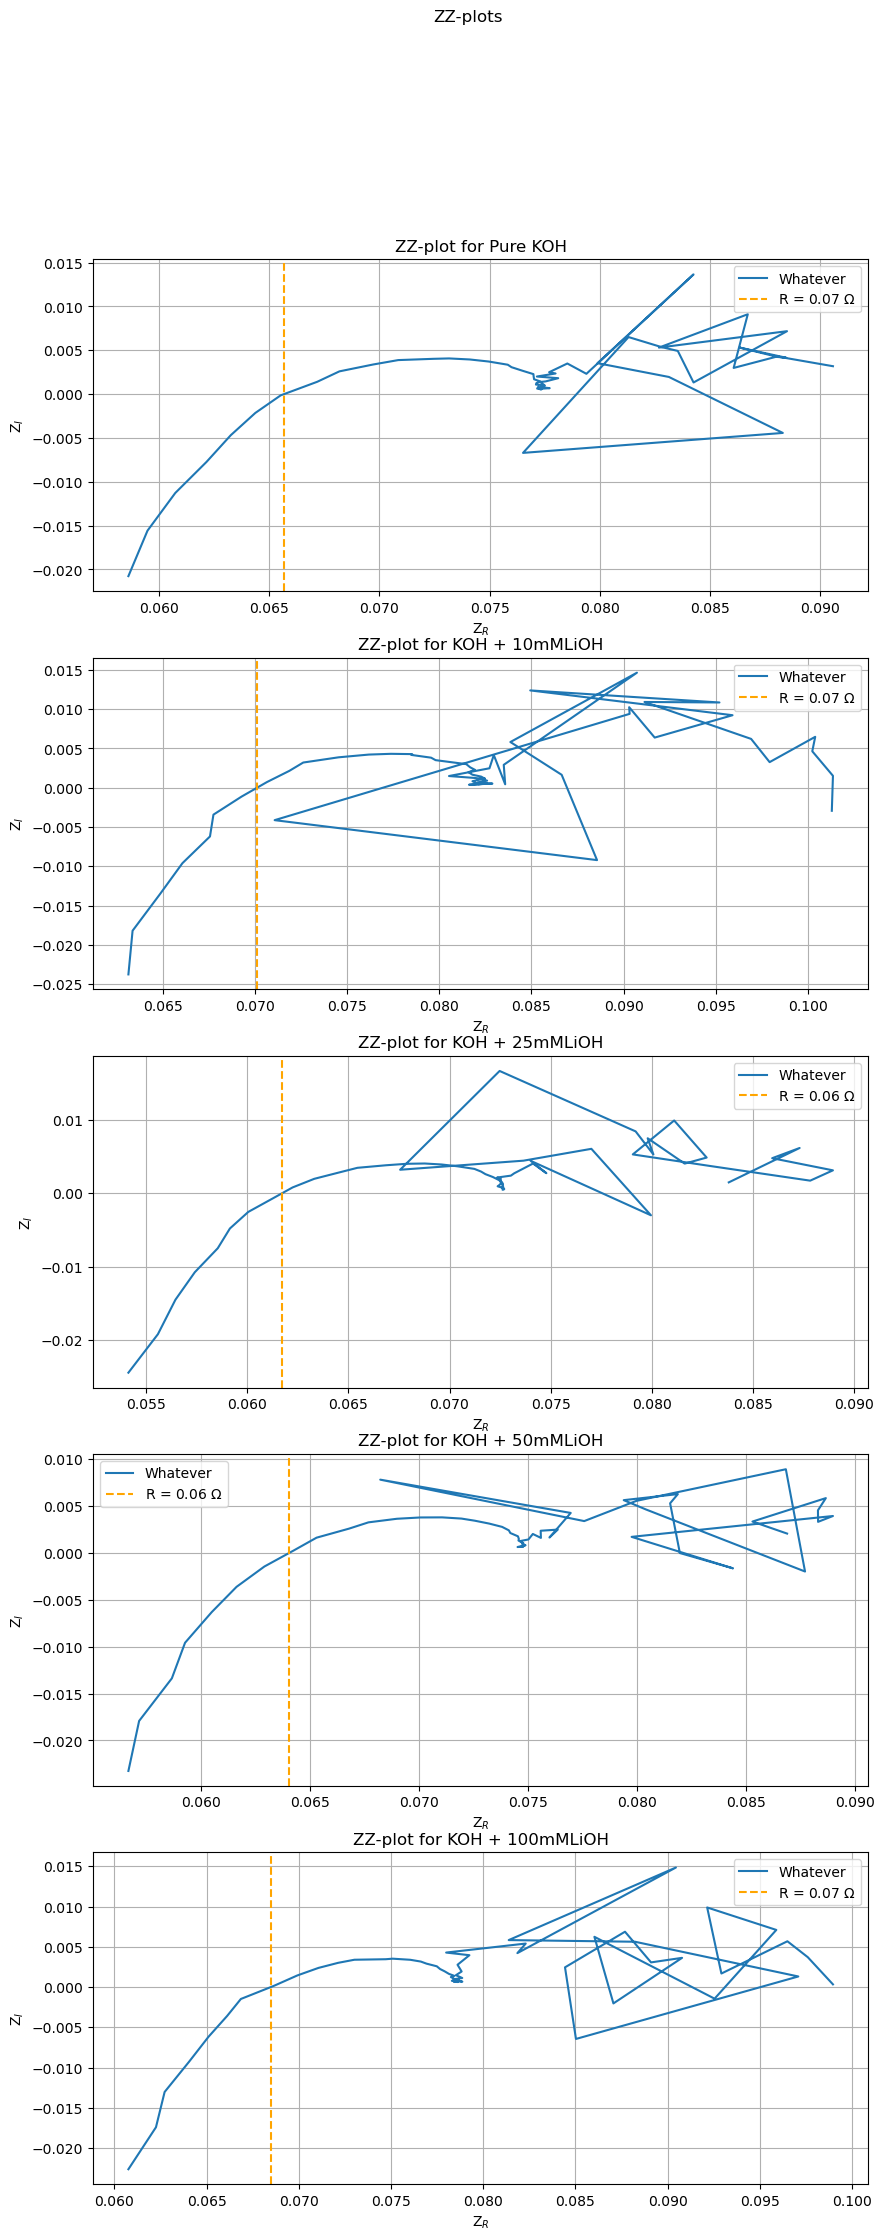

In [12]:
fig, ax = plt.subplots(nrows = len(experiments), figsize = (10, 5*len(experiments)))


#SPELL IT FOR ME PLS
fig.suptitle('ZZ-plots')



for i in range(max(1,len(experiments))):
    exp = experiments[i]
    data = exp.ZZplots[0]
    

    #Here too
    ax[i].set_title('ZZ-plot for ' + nice_titles[i])
    ax[i].plot(data['Zr'], data['Zi'],  label = 'Whatever')
    ax[i].grid()
    ax[i].set_xlabel('Z$_R$')
    ax[i].set_ylabel('Z$_I$')
    ax[i].axvline(exp.rs[0], label = f'R = {exp.rs[0]:.2f} $\\Omega$', color = 'orange', linestyle = '--')
    ax[i].legend()



Text(0, 0.5, 'Ohmic resistance [$\\Omega$]')

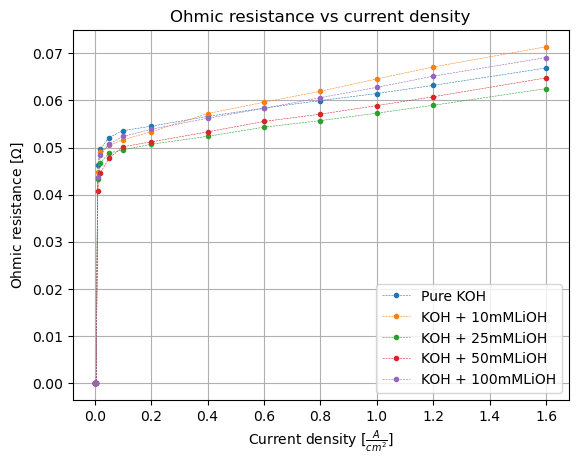

In [13]:
for i in range(max(1,len(experiments))):
    exp = experiments[i]
    exp.JR_dataframe.sort_values(by = 'J')
    plt.plot(exp.JR_dataframe['J'], exp.JR_dataframe['R'], label = nice_titles[i], marker = '.', linestyle = '--', lw = 0.4)

plt.grid(which='both')
plt.legend(loc = 'lower right')
plt.title('Ohmic resistance vs current density')
plt.xlabel('Current density [$\\frac{A}{cm^2}$]')
plt.ylabel('Ohmic resistance [$\\Omega$]')

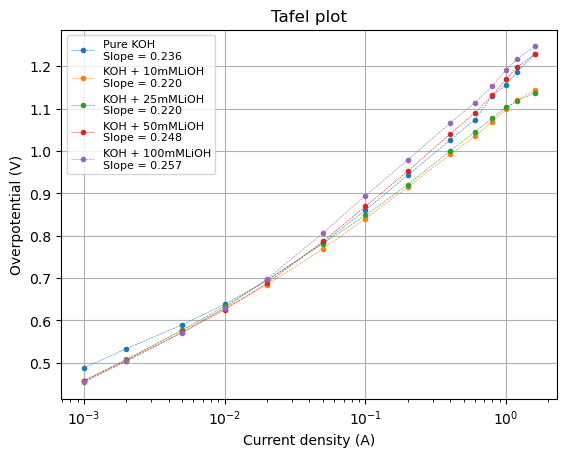

In [17]:
for i in range(max(1,len(experiments))):
    exp = experiments[i]
    exp.JR_dataframe.sort_values(by = 'J')
    plt.plot(exp.JR_dataframe['J'], exp.overpotential, label = nice_titles[i] + f'\nSlope = {exp.slope:.3f}',  marker = '.', linestyle = '--', lw = 0.4)

plt.xscale('log')
plt.grid()
plt.title('Tafel plot')
plt.xlabel('Current density (A)')
plt.ylabel('Overpotential (V)')
plt.legend(fontsize = 8)

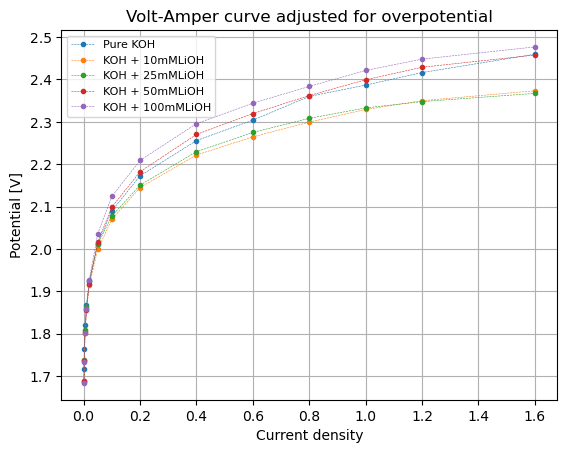

In [15]:
for i in range(max(1,len(experiments))):
    exp = experiments[i]
    exp.JR_dataframe.sort_values(by = 'J')
    overpotential_adjusted = [op + 1.23 for op in exp.overpotential]
    plt.plot(exp.JR_dataframe['J'], overpotential_adjusted, label = nice_titles[i] ,  marker = '.', linestyle = '--', lw = 0.4)


plt.grid()
plt.title('Volt-Amper curve adjusted for overpotential')
plt.xlabel('Current density')
plt.ylabel('Potential [V]')
plt.legend(fontsize = 8)

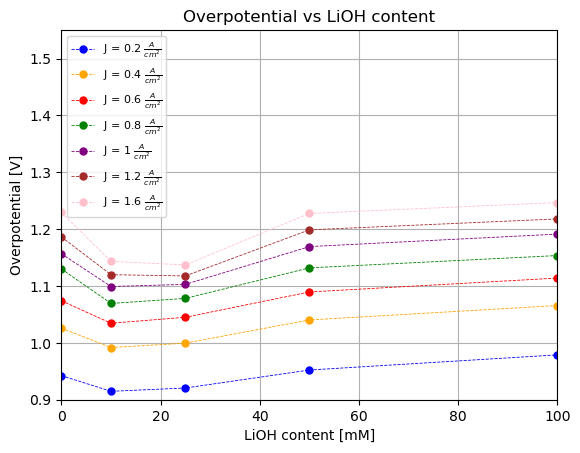

In [16]:
reqs = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.6]
li_content = np.array([0, 10,25, 50,100])
colors = ['blue', 'orange', 'red', 'green', 'purple', 'brown', 'pink']

interpolate = False

for i in range(len(reqs)):
    req = reqs[i]
    list = []
    for exper in experiments:
        list.append(exper.for_computation[exper.for_computation['J JR'] == req]['Overpotential'].values[0])
    list = np.array(list)
    spline = cs(li_content, list)
    if interpolate:
        plt.scatter(li_content, list, label = f'J = {req} '+'$\\frac{A}{cm^2}$', marker = '.', s = 100, color = colors[i])
        x = np.linspace(min(li_content), max(li_content), 100)
        plt.plot(x, spline(x), color = colors[i], linestyle = '--', lw = 0.4)
    else:
        plt.plot(li_content, list, label = f'J = {req} '+'$\\frac{A}{cm^2}$', marker = '.', markersize = 10, linestyle = '--', lw = 0.6, color = colors[i])


plt.grid()
plt.xlabel('LiOH content [mM]')
plt.ylabel('Overpotential [V]')
plt.title('Overpotential vs LiOH content')
plt.legend(fontsize = 8, loc = 'upper left')
plt.xlim(0, 100)
plt.ylim(0.9, 1.55)
plt.show()